# Import data
Hallo alle

store nbr = 44
item nbr = 1047679

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/timeseries.csv")

In [3]:
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' column is in datetime format
df.set_index('date', inplace=True)  # Set 'date' as the index

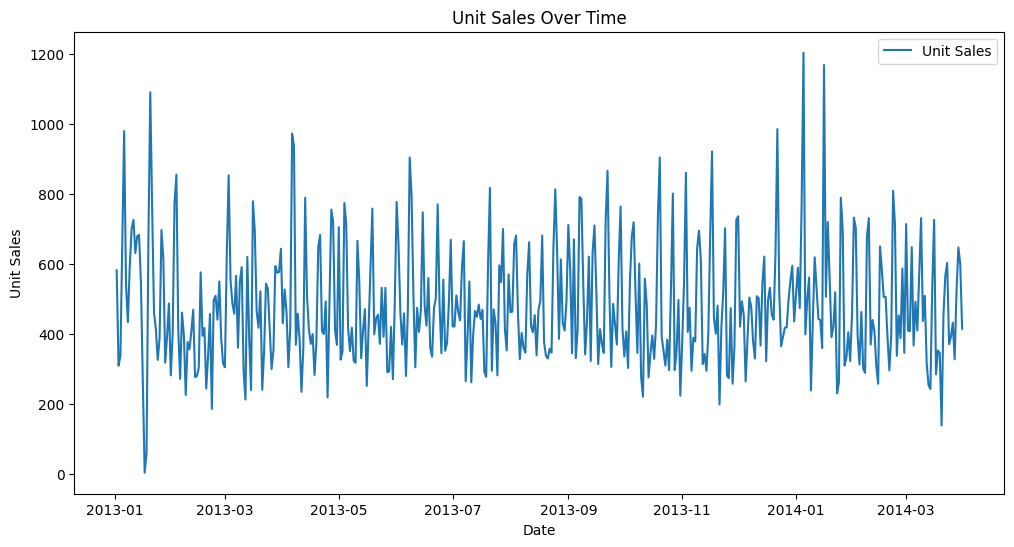

In [4]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['unit_sales'], label='Unit Sales')
plt.title('Unit Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend()
plt.show()

# Exploratory Data Analysis (EDA)

## Outlier Detection

In [13]:
# Calculate z-scores to identify outliers
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df['unit_sales']))
outliers = df[z_scores > 5]
outliers


,unit_sales
date,


## Missing Values

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

unit_sales    0
dtype: int64

In [24]:
pd.date_range(start=df.index.min(), end=df.index.max())

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09',
               '2013-01-10', '2013-01-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[us]', length=454, freq='D')

In [25]:
df.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09',
               '2013-01-10', '2013-01-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[us]', name='date', length=452, freq=None)

In [30]:
# Check if all days are present
date_range = pd.date_range(start=df.index.min(), end=df.index.max())
missing_dates = date_range.difference(df.index)
missing_dates

DatetimeIndex(['2013-12-25', '2014-01-01'], dtype='datetime64[us]', freq=None)

In [31]:
# Solve missing dates by forward filling
df = df.reindex(date_range)
df

,unit_sales
2013-01-02,582.0
2013-01-03,310.0
2013-01-04,338.0
2013-01-05,654.0
2013-01-06,979.0
...,...
2014-03-27,328.0
2014-03-28,523.0
2014-03-29,647.0
2014-03-30,599.0


In [38]:
# Fill missing unit_sales with forward fill
df['unit_sales'] = df['unit_sales'].ffill()

## Summary Statistics

In [39]:

summary_stats = df['unit_sales'].describe()
summary_stats

count     454.000000
mean      479.740088
std       170.560195
min         4.000000
25%       358.500000
50%       443.500000
75%       576.750000
max      1203.000000
Name: unit_sales, dtype: float64

## Seasonal Decomposition

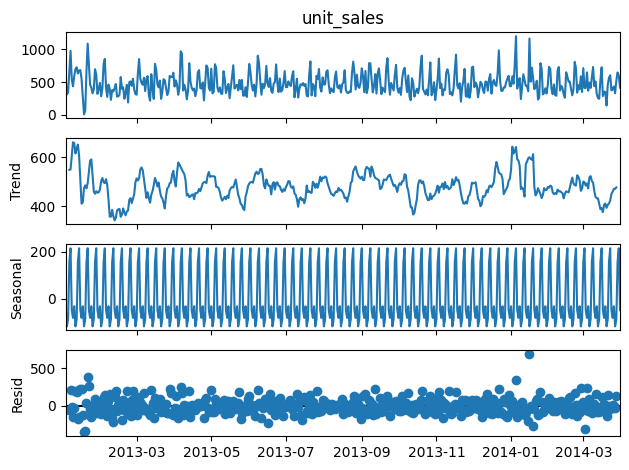

In [40]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Set frequenc to daily
df = df.asfreq('D')  # This is done for seasonal decomposition to infere seasonal patterns
# Perform seasonal decomposition
decomposition = seasonal_decompose(df['unit_sales'], model='additive')
decomposition.plot()
plt.show()

## Stationarity Test

In [41]:

from statsmodels.tsa.stattools import adfuller
# Perform Augmented Dickey-Fuller test
adf_result = adfuller(df['unit_sales'])
adf_result_dict = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}
adf_result_dict



{'ADF Statistic': np.float64(-5.051243167393035),
 'p-value': np.float64(1.7554305139623423e-05),
 'Critical Values': {'1%': np.float64(-3.4454725477848998),
  '5%': np.float64(-2.8682072297316794),
  '10%': np.float64(-2.570321396485665)}}

## Autocorrelation Analysis

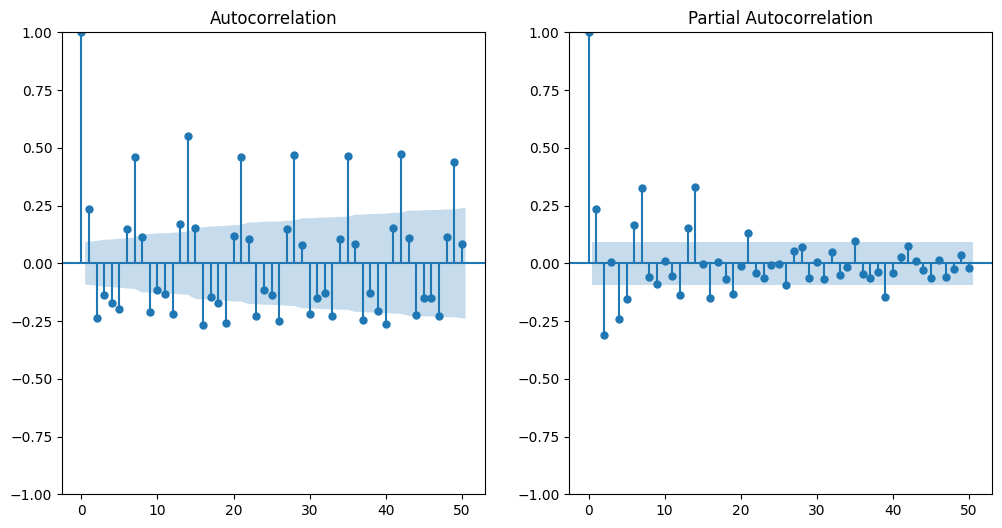

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['unit_sales'], ax=plt.gca(), lags=50)
plt.subplot(122)
plot_pacf(df['unit_sales'], ax=plt.gca(), lags=50)
plt.show()



## Save cleaned data

In [44]:
# Save the cleaned data
df.index.name = "date"
df.to_csv("../data/cleaned_timeseries.csv", index=True)

# For Students: Further EDA and Analysis
Ideas:
    - Do holidays impact sales?
    - Does the day of the week the impact sales?
    - Does the oil price impact sales?
    - Get creative and explore the data further! Even if the results show that there is no impact, that is still a useful finding!! We would like mostly to see the thought process no need on statistical perfection (: